In [59]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option("display.max_columns",None)

In [60]:
a=pd.read_csv("Alcohol_Sales.csv")

In [61]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [62]:
# PS is to forecast alcohol sales for next 12 months
a.columns

Index(['DATE', 'S4248SM144NCEN'], dtype='object')

In [63]:
a = a.rename(columns={"S4248SM144NCEN": "Sales"})


In [64]:
a.DATE=pd.to_datetime(a.DATE,infer_datetime_format=True)

In [65]:
a.DATE

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
320   2018-09-01
321   2018-10-01
322   2018-11-01
323   2018-12-01
324   2019-01-01
Name: DATE, Length: 325, dtype: datetime64[ns]

In [66]:
a=a.set_index(["DATE"])


In [67]:
a

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


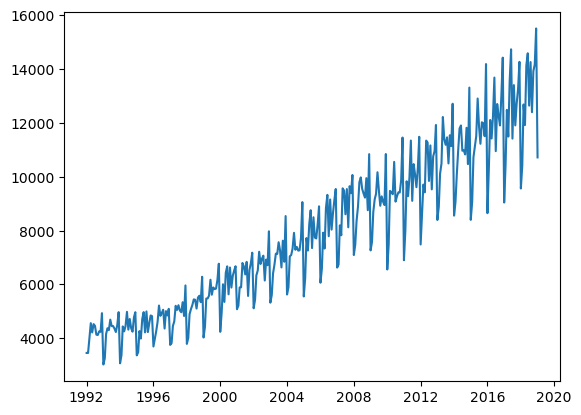

In [68]:
# Stationary or not 
import matplotlib.pyplot as plt
plt.plot(a)
plt.show()

In [69]:
#The series which we got is not Stationary 
a.diff()

,Sales
DATE,
1992-01-01,NaN
1992-02-01,-1.0
1992-03-01,544.0
1992-04-01,562.0
1992-05-01,-343.0
...,...
2018-09-01,-1861.0
2018-10-01,1518.0
2018-11-01,260.0


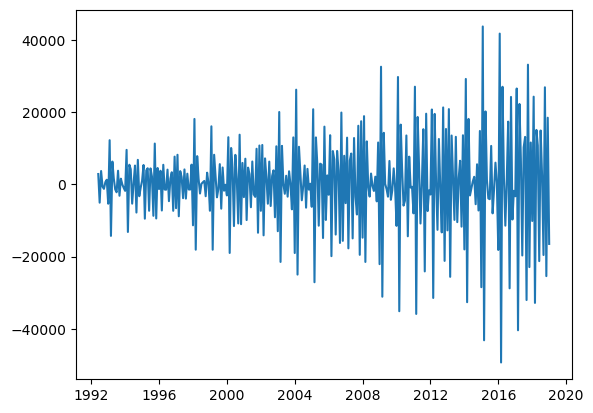

In [70]:
plt.plot(a.diff().diff().diff().diff().diff())

In [71]:
# Even after multiple level of differencing series does not become stationary
# We are going to take log of the series
a_log=np.log(a)

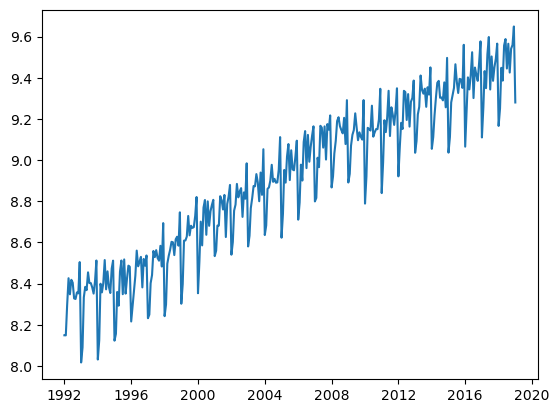

In [72]:
plt.plot(a_log)

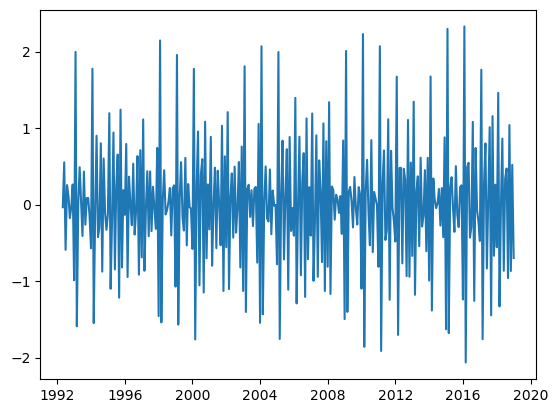

In [73]:
plt.plot(a_log.diff().diff().diff().diff())

In [74]:
# After taking log and applying the differencing we get the series Stationary
# Variance Stable krne ke liye log lete hai
# for building a model we need 3 things are p,q,d ,d=4
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


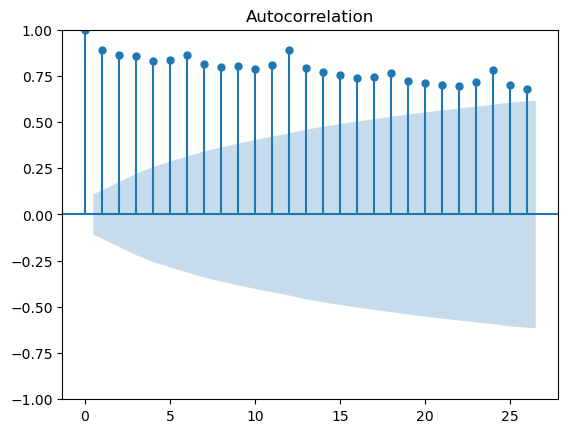

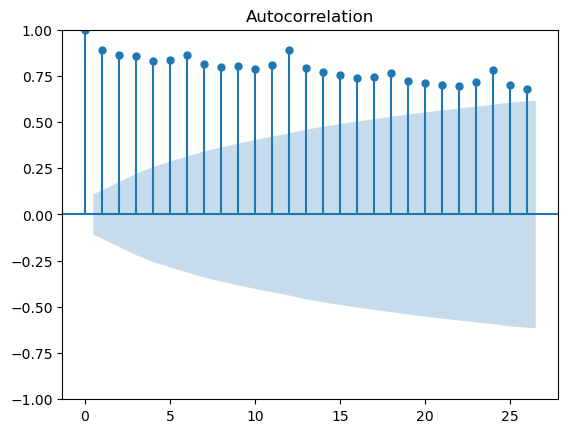

In [75]:
plot_acf(a)

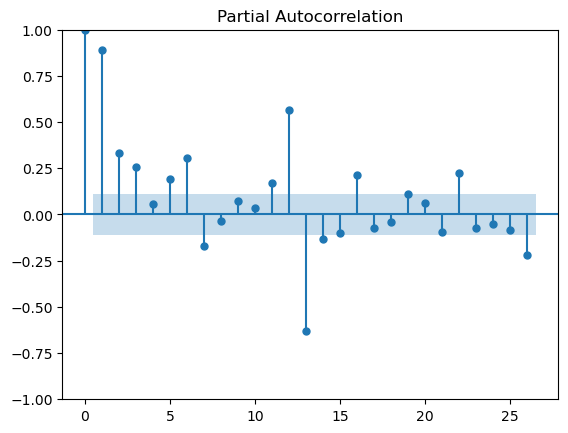

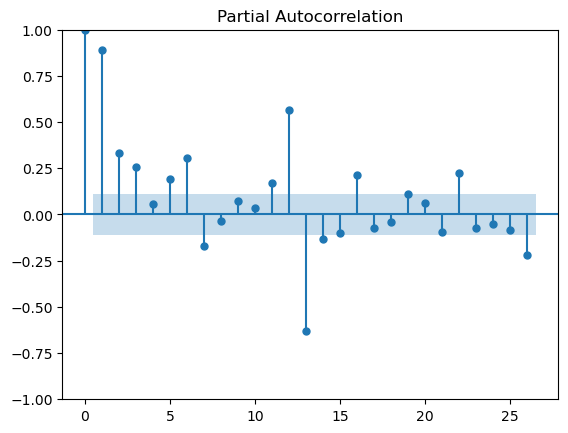

In [76]:
plot_pacf(a)

In [77]:
# When your ACF declines slowly or gradually and pacf declines sharply then we called as AR Process
# After a 7 lags we are getting corelation=0 so this is AR(7) process
# AR mapped to P
# The values we got (p=7,d=4,q=0)

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

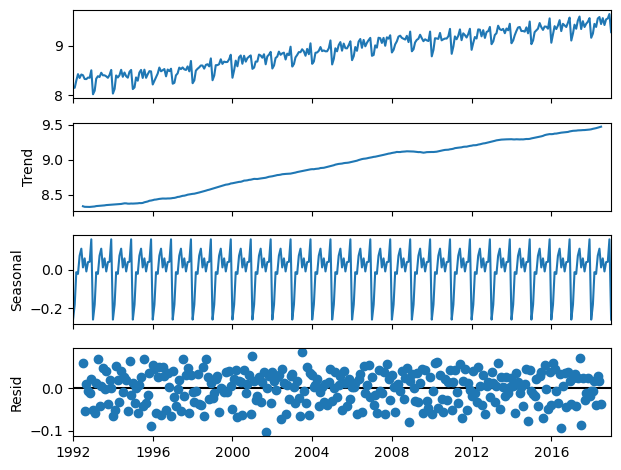

In [79]:
result=seasonal_decompose(a_log)
result.plot();

In [80]:
auto_arima(a_log,seasonal=True,m=12)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True)

In [81]:
# Whatever values will get from auto_arima we will pass them in Sarimax
sarimax=SARIMAX(a_log,order=(3,1,1),seasonal_order=(2,0,0,12))

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
a_=sarimax.fit()

E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
pred=a_.predict(start=325,end=336)

In [89]:
pred

2019-02-01    9.318461
2019-03-01    9.529783
2019-04-01    9.475097
2019-05-01    9.613316
2019-06-01    9.670114
2019-07-01    9.512359
2019-08-01    9.623592
2019-09-01    9.502627
2019-10-01    9.603785
2019-11-01    9.620768
2019-12-01    9.712542
2020-01-01    9.344125
Freq: MS, Name: predicted_mean, dtype: float64

In [90]:
pred1=np.exp(pred)
pred1

2019-02-01    11141.825536
2019-03-01    13763.609694
2019-04-01    13031.139849
2019-05-01    14962.704409
2019-06-01    15837.157760
2019-07-01    13525.863766
2019-08-01    15117.258270
2019-09-01    13394.867167
2019-10-01    14820.772164
2019-11-01    15074.622754
2019-12-01    16523.546423
2020-01-01    11431.462281
Freq: MS, Name: predicted_mean, dtype: float64

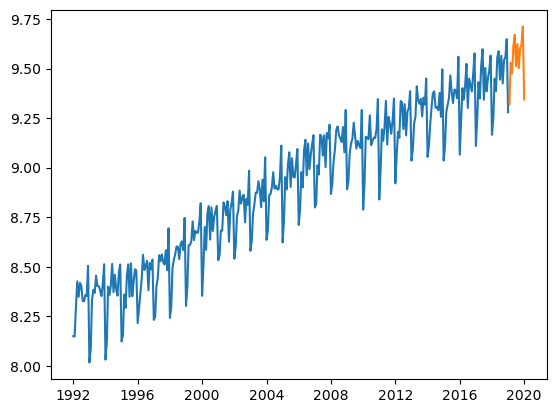

In [91]:
plt.plot(a_log)
plt.plot(pred)

In [92]:
df=pd.DataFrame()
df["Predicted"]=pred1
date=['2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01',
     '2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01']
df["Sales"]=date
df.Sales=pd.to_datetime(df.Sales,infer_datetime_format=True)
df=df.set_index(["Sales"])

In [93]:
df

,Predicted
Sales,
2019-02-01,11141.825536
2019-03-01,13763.609694
2019-04-01,13031.139849
2019-05-01,14962.704409
2019-06-01,15837.157760
2019-07-01,13525.863766
2019-08-01,15117.258270
2019-09-01,13394.867167
2019-10-01,14820.772164


<Axes: xlabel='Sales'>

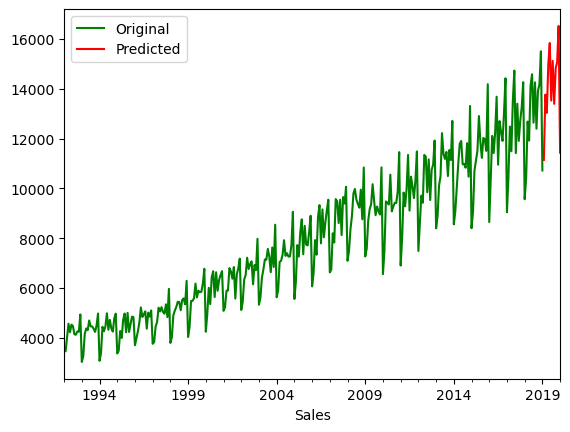

In [94]:
a["Sales"].plot(legend=True, label="Original", color="green")
df["Predicted"].plot(legend=True, label="Predicted", color="red")